IMPORT ALL

In [2]:
#   ---------  Project Forecast evaluation  ---------
#                     COMBINATION
#             
#                 ---------------------
#                   SEBASTIAN SUWADA 
#                 ---------------------
#

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
import os

IMPORT ALL DATA

In [6]:


def iterateOverFiles(csv_files, folder_path):
    data_frames = []

    for name in csv_files:
        file_path = os.path.join(folder_path, name)
        df = pd.read_csv(file_path)
        data_frames.append(df)
    
    combined_df = pd.concat(data_frames, axis=1)
    print(combined_df)

    return combined_df    

def prepareData(filename):
    df = pd.read_csv(filename, sep=';')
    data_orginal = df[df['Category'] == 'Furniture'].copy()
    data_orginal = data_orginal[['Order Date','Sales']].set_index('Order Date')
    data_orginal = data_orginal.groupby('Order Date').sum().reset_index()
    data_orginal['Order Date'] = pd.to_datetime(data_orginal['Order Date'])
    resampled = data_orginal.resample('MS', on='Order Date').mean()
    return resampled


## IMPORT DATA
filename = '/Users/sebastiansuwada/Desktop/Predictive Analytics/Project/Code/data.csv'
orginalData = prepareData(filename)

## GET FOLDER OF ALL PREDICTED DATA CSV's
folder_path = '/Users/sebastiansuwada/Desktop/Predictive Analytics/Project/Code/predictedData'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

print(csv_files)
data_frames = iterateOverFiles(csv_files, folder_path)


['Sarima_1CSV.csv', 'ETS_LIB.csv', 'CNNCSV.csv', 'tes_lib.csv', 'arimaCSV.csv', 'lstm.csv', 'tes_simp.csv', 'ets_simp.csv', 'des_simp.csv', 'prophetCSV.csv', 'des_lib.csv', 'Sarima_2CSV.csv', 'armaCSV.csv', 'arima_bestCSV.csv', 'index.csv']
         sarim1          ets   cnn       teslib      arima1         lstm  \
0    857.282219  1054.433092   891   797.739267  831.385305   985.253272   
1    479.778082  1054.433092   601   557.923632  829.595977   458.807335   
2    737.039757  1054.433092   567   892.337453  840.857134   501.158362   
3    777.385953  1054.433092   520   833.129495  585.827299   545.456545   
4    641.028694  1054.433092   440   724.410498  570.203568   579.780314   
5    528.550983  1054.433092   606   789.466006  702.834479   733.080356   
6    732.329871  1054.433092   633   839.174390  707.430820   780.460500   
7    636.370616  1054.433092   682   740.297197  747.601131   798.151696   
8   1319.238605  1054.433092  1277  1312.074241  842.811957  1040.744878   

CREATE CARTESIAN PRODUCT OF ALL COLUMNS IN DATAFRAME

In [17]:
columns_to_combine = ['sarim1', 'arma', 'ets', 'cnn', 'teslib', 'arima1', 'lstm', 'tessimp', 'etssimp', 'dessimp', 'prop', 'deslib', 'sarim2', 'arimabest']

# Generate all possible combinations without repetition
all_combinations = []
for r in range(1, len(columns_to_combine) + 1):
    all_combinations.extend(combinations(columns_to_combine, r))

## Transfer Touples in list into lists. 
list_of_lists = [list(t) for t in all_combinations]
## FILTER lists in list that have only one value
filtered_list = [lst for lst in list_of_lists if len(lst) > 1]

print(data_frames[filtered_list[0]])

print(filtered_list)

         sarim1        arma
0    857.282219  950.771041
1    479.778082  862.273458
2    737.039757  820.596872
3    777.385953  800.969920
4    641.028694  791.726906
5    528.550983  787.374049
6    732.329871  785.324138
7    636.370616  784.358763
8   1319.238605  783.904135
9    630.892729  783.690035
10  1282.747663  783.589208
11  1142.394262  783.541724
[['sarim1', 'arma'], ['sarim1', 'ets'], ['sarim1', 'cnn'], ['sarim1', 'teslib'], ['sarim1', 'arima1'], ['sarim1', 'lstm'], ['sarim1', 'tessimp'], ['sarim1', 'etssimp'], ['sarim1', 'dessimp'], ['sarim1', 'prop'], ['sarim1', 'deslib'], ['sarim1', 'sarim2'], ['sarim1', 'arimabest'], ['arma', 'ets'], ['arma', 'cnn'], ['arma', 'teslib'], ['arma', 'arima1'], ['arma', 'lstm'], ['arma', 'tessimp'], ['arma', 'etssimp'], ['arma', 'dessimp'], ['arma', 'prop'], ['arma', 'deslib'], ['arma', 'sarim2'], ['arma', 'arimabest'], ['ets', 'cnn'], ['ets', 'teslib'], ['ets', 'arima1'], ['ets', 'lstm'], ['ets', 'tessimp'], ['ets', 'etssimp'], ['ets', 

GRID SEARCH FOR BEST CHOSE OF COMBINATION

Best MSE is: 9996.887381328366 , best MAPE is: 9.600609761144447 , RMSE is:99.98443569540395 and for combination of ['etssimp', 'dessimp']


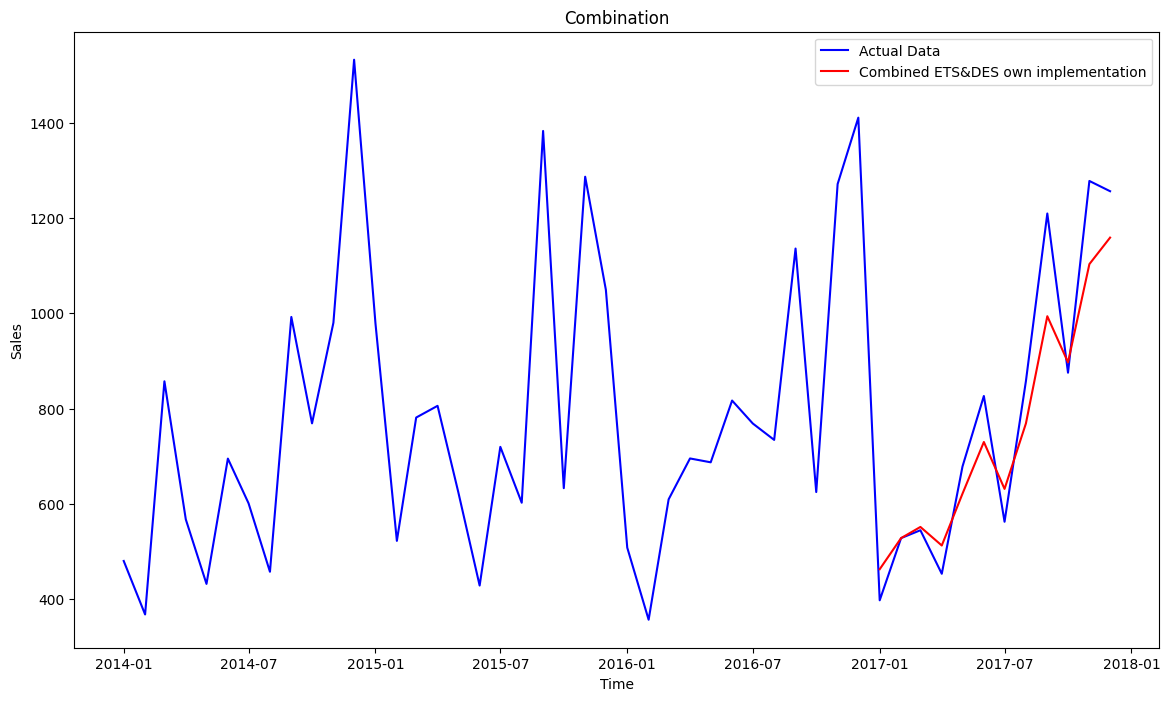

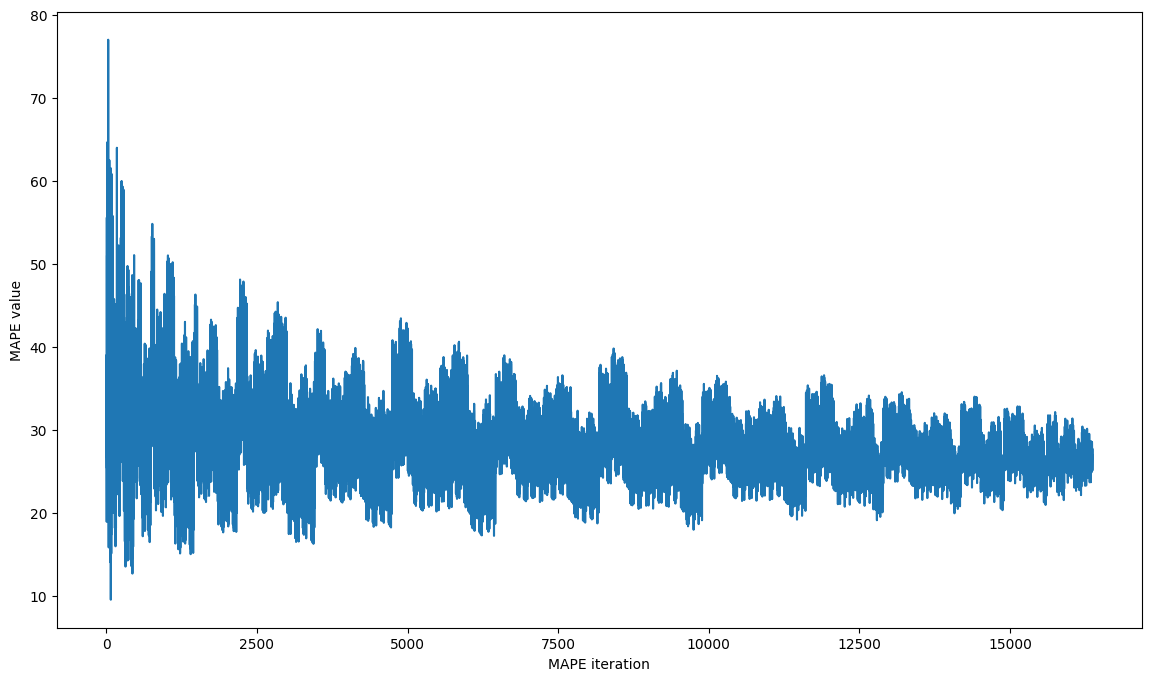

In [19]:
def plotPredictions(forecast, initial, label_):
    plt.figure(figsize=(10, 6))
    plt.plot(initial, label='Actual Data', color='blue')
    plt.plot(forecast, label=label_, color='red')
    plt.title(label_)
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()


# Evaluation of MSE
def evaluateForecast(initial, forecast):
    initial_values = np.array(initial)
    forecast_values = np.array(forecast)
    # Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE)
    mse = np.mean((initial_values - forecast_values)**2)
    mape = np.mean(np.abs((initial_values - forecast_values) / initial_values)) * 100
    rmse = np.sqrt(mse)
    return mse, mape, rmse


def gridSearch(filtered_list, data_frames, initial, orginalData):
    mape_list = []
    best_MAPE = float('inf')
    mse_list = []

    for lis in filtered_list:

        # Create temporary DataFrame and fill it with zeros
        df_ = pd.DataFrame({'combination': [0] * 12})

        # Iterate over the combination and products of this combination - add values 
        for i in range(len(lis)):
            data_frames[lis[i]]
            df_['combination'] = df_['combination'] + data_frames[lis[i]]
        
        
        # print(df_['combination'])
        # print(df_['combination'])
        df_['prediction'] = df_['combination']/(len(lis))
        # print(df_['prediction'])
        
        # Push prediction into evaluation part with initial values

        mse, mape, rmse = evaluateForecast(initial, df_['prediction'])
        mape_list.append(mape)
        mse_list.append(mse)
        if mape < best_MAPE:
            best_mse = mse
            best_MAPE = mape
            best_RMSE = rmse
            currBestvalues = df_['prediction']
            currBestParam = lis

        # Delete the DataFrame
        del df_

    print('Best MSE is: '+str(best_mse)+' , best MAPE is: '+str(best_MAPE)+' , RMSE is:'+str(best_RMSE)+' and for combination of '+str(currBestParam))

    plotDF = pd.DataFrame()
    plotDF['ds'] = orginalData.iloc[36:48].index
    plotDF['combination'] = currBestvalues
    plotDF.set_index('ds', inplace=True)
    plt.figure(figsize=(14, 8))
    plt.plot(orginalData, label='Actual Data', color='blue')
    plt.plot(plotDF, label='Combined ETS&DES own implementation', color='red')
    plt.title('Combination')
    plt.xlabel('Time')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(14, 8))
    plt.title('')
    plt.xlabel('MAPE iteration')
    plt.ylabel('MAPE value')
    plt.plot(mape_list)
    plt.show()

#, 'ets', 'cnn', 'teslib', 'arima1', 'lstm', 'tessimp', 'etssimp', 'dessimp', 'prop', 'deslib'
initial = orginalData[36:48]['Sales']
initial = initial.reset_index(drop=True)

gridSearch(filtered_list, data_frames, initial, orginalData)